# **TUGAS PRAKTIKUM JOBSHEET 7**

**Nama : Elis Nurhidayati**

**NIM : 2241720035**

**Kelas : TI-3C**


Link Google Colab : https://colab.research.google.com/drive/1NdCFfp7yk8W92czh6gzq141trsKnm7IR#scrollTo=Rb6U9sD_Jl7b

Buatlah sebuah model K-Means dengan ketentuan:

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

## **1. Gunakan data 'Mall_Customers.csv'**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io

In [3]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Elis-3C/SMT 5/ML/Jobsheet 7/dataset/Mall_Customers.csv"
df = pd.read_csv(path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Cek kolom null
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## **2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

In [5]:
features = df[['Age', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## **3. Buatlah model K-Means dengan mempertimbangkan jumlah yang terbaik**

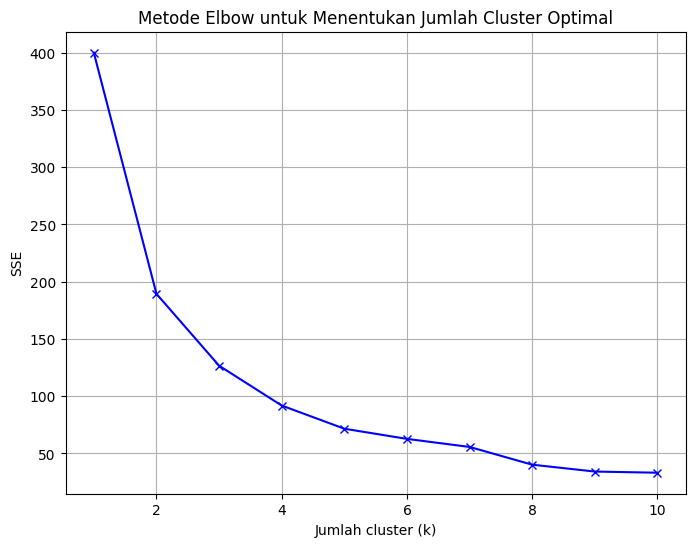

In [6]:
# Elbow method for finding the optimal k
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Menampilkan plot Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid()
plt.show()

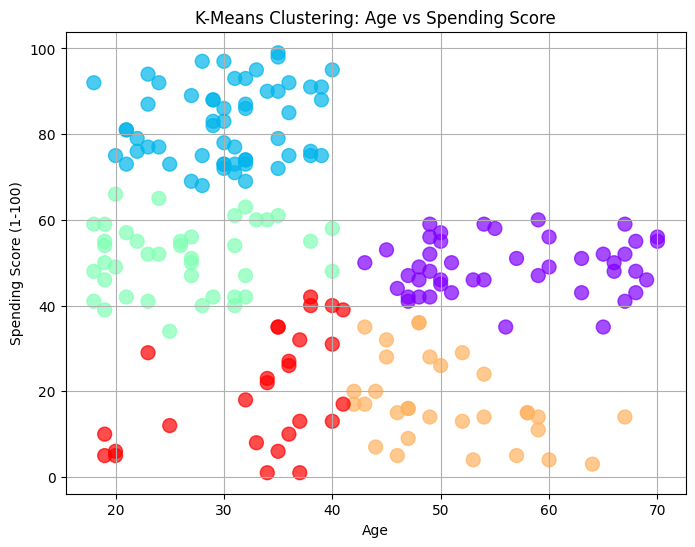

In [7]:
# Asumsikan jumlah cluster terbaik berdasarkan plot adalah k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Menambahkan label cluster ke data asli
df['Cluster'] = cluster_labels

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=cluster_labels, cmap='rainbow', s=100, alpha=0.7)
plt.title('K-Means Clustering: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

## **4. Buatlah implementasi model SOM untuk segmentasi citra lain**

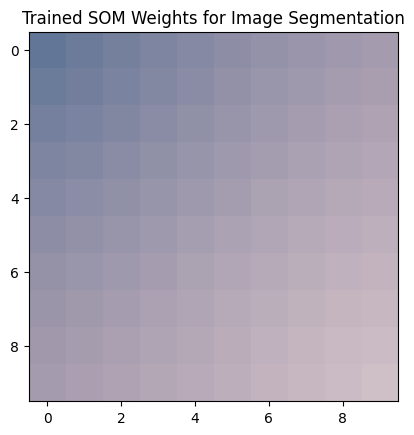

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    # Menghitung jarak antara unit SOM dan unit pemenang
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    # Menghitung pengaruh tetangga
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    # Update bobot dengan vektor input
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    # Mengambil subset data secara acak untuk mempercepat pelatihan
    indices = np.random.choice(input_shape[0] * input_shape[1], size=1000, replace=False)
    row_indices, col_indices = np.unravel_index(indices, (input_shape[0], input_shape[1]))

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        # Pemrosesan SOM
        for idx in range(len(row_indices)):
            i, j = row_indices[idx], col_indices[idx]
            input_vector = image[i, j, :]
            winner = find_winner_unit_in_image(input_vector, weights)
            update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

# Load citra untuk segmentasi
jekey_path = "/content/drive/MyDrive/Elis-3C/SMT 5/ML/Jobsheet 7/dataset/jekey.jpeg"
image = io.imread(jekey_path) / 255.0  # Normalisasi intensitas piksel
image = transform.resize(image, (image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=True)

# Latih SOM
num_epochs = 50  # Mengurangi jumlah epoch
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Image Segmentation')
plt.show()
